In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv(r"C:\Users\tayoo_x4di65g\OneDrive\Documents\Data Science\Uploadables\Quality Prediction in a mining process\MiningProcess_Flotation_Plant_Database.csv")
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [5]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

Information from the Kaggle data set page says:

The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant

Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process.

From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality

The last two columns are the final iron ore pulp quality measurement from the lab.

Target is to predict the last column, which is the % of silica in the iron ore concentrate.


##### <b> Now before we start any analysis it is important to note that the counsel and collaboration of the actual engineers and field experts is paramount, ML algorithms are Garbage In Garbage Out and nothing is as important as practical knowledge of the process being analyzed. I will be trying my best to answer some of the inquiries on the kaggle dataset post</b>

Objectives:

Is it possible to predict % Silica Concentrate every minute?

How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.

Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

In [7]:
df['date'] = pd.to_datetime(df['date']) # converting the date column to timedate format in pandas

In [8]:
#trying to see if we can extract the data by the minutes
import random
for i in range(2,30):
    print(df['date'][random.randint(0,len(df))].minute) 
    # as we can see, this data doesn't really have data recorded by the minute

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
# Another way I think we can do this is by using the hours but in fractions, for example 3.5 meaning 3:30AM 
df['hours'] = df['date'].apply(lambda x: x.hour)

In [10]:
df['hours'].nunique() #24 unique times I am guessing representing the number of hours in a day

24

In [11]:
# I tried to work with the data but I will need to conver the numerical values into a compatible format 
# so I have to do a little data engineering
numerical_values = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate']


In [12]:
for i in numerical_values:
    df[i] = df[i].apply(lambda x: x.replace(',','.'))
    df[i] = df[i].apply(lambda x: float(x))

The reason why I did that was because we wouldn't be able to use that data if we don't convert;
Also I assumed that the comma was better replaced by a decimal point 

I will try to analyze the other columns which are not as "important" as the first 8



In [13]:
airflow_features = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow']]
airflow_features.head()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow
0,249.214,253.235,250.576,295.096,306.4,250.225,250.884
1,249.719,250.532,250.862,295.096,306.4,250.137,248.994
2,249.741,247.874,250.313,295.096,306.4,251.345,248.071
3,249.917,254.487,250.049,295.096,306.4,250.422,251.147
4,250.203,252.136,249.895,295.096,306.4,249.983,248.928


In [14]:
column_level = df[['Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']]
column_level.head()

,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,451.891,429.560,432.939,448.086,496.363,445.922,498.075
2,451.240,468.927,434.610,449.688,484.411,447.826,458.567
3,452.441,458.165,442.865,446.210,471.411,437.690,427.669
4,452.441,452.900,450.523,453.670,462.598,443.682,425.679


In [15]:
airflow_features['mean'] = airflow_features.mean(axis=1)

C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/3084494656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airflow_features['mean'] = airflow_features.mean(axis=1)


In [16]:
airflow_features.head()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,mean
0,249.214,253.235,250.576,295.096,306.4,250.225,250.884,265.090000
1,249.719,250.532,250.862,295.096,306.4,250.137,248.994,264.534286
2,249.741,247.874,250.313,295.096,306.4,251.345,248.071,264.120000
3,249.917,254.487,250.049,295.096,306.4,250.422,251.147,265.359714
4,250.203,252.136,249.895,295.096,306.4,249.983,248.928,264.663000


In [19]:
airflow_features['standard_deviation'] = airflow_features.std(axis=1)

C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/3839166548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airflow_features['standard_deviation'] = airflow_features.std(axis=1)


In [20]:
airflow_features.head()

,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,mean,variance,standard_deviation
0,249.214,253.235,250.576,295.096,306.4,250.225,250.884,265.090000,518.985628,87.273517
1,249.719,250.532,250.862,295.096,306.4,250.137,248.994,264.534286,534.003832,92.387539
2,249.741,247.874,250.313,295.096,306.4,251.345,248.071,264.120000,547.029058,96.807592
3,249.917,254.487,250.049,295.096,306.4,250.422,251.147,265.359714,512.114230,84.931796
4,250.203,252.136,249.895,295.096,306.4,249.983,248.928,264.663000,530.764062,91.280728


<Figure size 720x648 with 0 Axes>

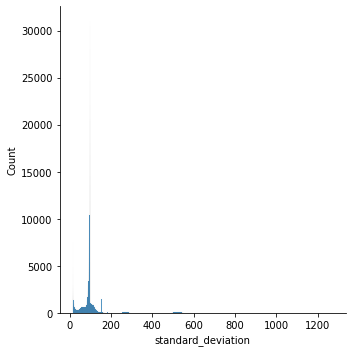

In [46]:
# I have to visualize the mean to see if it is normally distributed
plt.figure(figsize = (10,9))
sns.displot(airflow_features['standard_deviation'])

<Figure size 720x648 with 0 Axes>

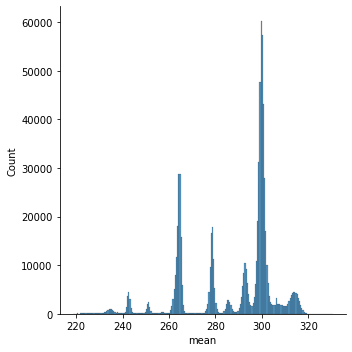

In [45]:
plt.figure(figsize = (10,9))
sns.displot(airflow_features['mean'])

In [35]:
column_level['mean'] = column_level.mean(axis =1)
column_level.head()

C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/1118189490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_level['mean'] = column_level.mean(axis =1)


,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,mean
0,457.396,432.962,424.954,443.558,502.255,446.370,523.344,461.548429
1,451.891,429.560,432.939,448.086,496.363,445.922,498.075,457.548000
2,451.240,468.927,434.610,449.688,484.411,447.826,458.567,456.467000
3,452.441,458.165,442.865,446.210,471.411,437.690,427.669,448.064429
4,452.441,452.900,450.523,453.670,462.598,443.682,425.679,448.784714


In [36]:
column_level['standard_deviation'] = column_level.std(axis =1)
column_level.head()

C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/4167672255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_level['standard_deviation'] = column_level.std(axis =1)


,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,mean,standard_deviation
0,457.396,432.962,424.954,443.558,502.255,446.370,523.344,461.548429,34.233101
1,451.891,429.560,432.939,448.086,496.363,445.922,498.075,457.548000,26.171598
2,451.240,468.927,434.610,449.688,484.411,447.826,458.567,456.467000,14.958039
3,452.441,458.165,442.865,446.210,471.411,437.690,427.669,448.064429,13.203428
4,452.441,452.900,450.523,453.670,462.598,443.682,425.679,448.784714,10.743172


C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

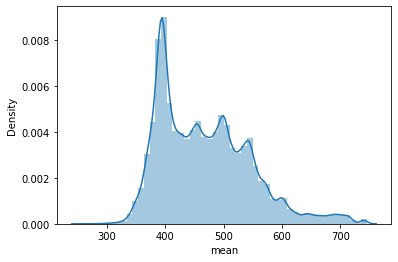

In [44]:
sns.distplot(column_level['mean'])

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='standard_deviation', ylabel='Density'>

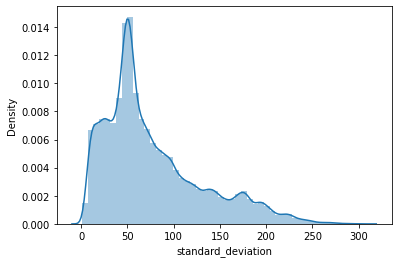

In [47]:
sns.distplot(column_level['standard_deviation'])

##### I can see that the distributions are not normal so I will try to build models with and without the mean column 

In [29]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'hours'],
      dtype='object')

In [30]:
# I am going to ignore the date column and assume the hours is really what matters and not time of the year (month, day)
important_columns = df[['hours','% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density']]

In [31]:
important_columns.head()

,hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density
0,1,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74
1,1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74
2,1,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74
3,1,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74
4,1,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74


In [34]:
important_columns['hours'].nunique() #since all the different hours of the day will be included in our model, I assume this answers objective number 2

24

In [48]:
important_columns['airflow_mean'] = airflow_features['mean']
important_columns['column_level_mean'] = column_level['mean']

C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/2711520125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_columns['airflow_mean'] = airflow_features['mean']
C:\Users\tayoo_x4di65g\AppData\Local\Temp/ipykernel_22684/2711520125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_columns['column_level_mean'] = column_level['mean']


In [50]:
important_columns[['% Iron Concentrate', '% Silica Concentrate']] = df[['% Iron Concentrate', '% Silica Concentrate']]

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [51]:
important_columns

,hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,airflow_mean,column_level_mean,% Iron Concentrate,% Silica Concentrate
0,1,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,265.090000,461.548429,66.91,1.31
1,1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,264.534286,457.548000,66.91,1.31
2,1,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,264.120000,456.467000,66.91,1.31
3,1,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,265.359714,448.064429,66.91,1.31
4,1,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,264.663000,448.784714,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...
737448,23,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,308.617857,496.341714,64.27,1.71
737449,23,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,295.896714,484.948143,64.27,1.71
737450,23,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,295.092714,481.131857,64.27,1.71
737451,23,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,308.616143,490.420000,64.27,1.71


In [ ]:
# First, let us look at objective 3 again #
# Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

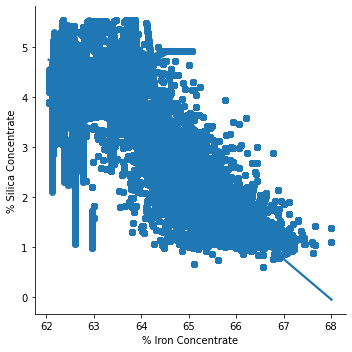

In [56]:
sns.lmplot(x='% Iron Concentrate', y= '% Silica Concentrate', data = important_columns)

##### They're inversely related, might not be crystal clear but that's what the trend shows and that makes sense, it's a percentage basis, more of one means less of the other

In [64]:
important_columns[  important_columns['% Iron Concentrate'] ==important_columns['% Iron Concentrate'].max()]

,hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,airflow_mean,column_level_mean,% Iron Concentrate,% Silica Concentrate
453413,6,47.79,27.08,6014.51,545.004,404.941,10.3682,1.77036,300.922429,465.692000,68.01,1.38
453414,6,47.79,27.08,5844.18,544.919,405.238,10.3724,1.77040,297.729286,475.603429,68.01,1.38
453415,6,47.79,27.08,5692.20,551.313,398.356,10.3765,1.77043,298.300143,487.285000,68.01,1.38
453416,6,47.79,27.08,5567.63,545.244,404.124,10.3804,1.77047,300.203857,487.283571,68.01,1.38
453417,6,47.79,27.08,5449.49,547.536,386.188,10.3815,1.77050,300.937000,483.185571,68.01,1.38
...,...,...,...,...,...,...,...,...,...,...,...,...
453588,6,47.79,27.08,3011.24,483.231,396.766,10.5424,1.68898,302.032000,482.916714,68.01,1.38
453589,6,47.79,27.08,3022.47,488.706,404.220,10.5450,1.68867,297.508429,489.135571,68.01,1.38
453590,6,47.79,27.08,3044.90,483.523,402.045,10.5476,1.68835,299.380286,494.679000,68.01,1.38
453591,6,47.79,27.08,3091.51,488.744,396.982,10.5460,1.68804,299.731286,509.419000,68.01,1.38


In [67]:
important_columns['% Iron Concentrate'].mean()

65.05006799077364

In [66]:
important_columns['% Silica Concentrate'].mean()

2.326763251352968

In [65]:
important_columns[important_columns['% Silica Concentrate']==  important_columns['% Silica Concentrate'].min()]

,hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,airflow_mean,column_level_mean,% Iron Concentrate,% Silica Concentrate
615413,18,48.81,25.31,3994.20,445.584,377.1880,10.4300,1.69055,292.852571,511.870000,66.57,0.6
615414,18,48.81,25.31,4016.17,436.711,376.9425,10.4287,1.69084,290.480571,505.885429,66.57,0.6
615415,18,48.81,25.31,4062.65,477.860,376.6970,10.4274,1.69113,292.257714,525.719286,66.57,0.6
615416,18,48.81,25.31,4078.01,478.430,379.3210,10.4261,1.69142,295.084571,524.433429,66.57,0.6
615417,18,48.81,25.31,4063.95,524.298,382.5740,10.4248,1.69171,294.435143,530.067000,66.57,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
615588,18,48.81,25.31,3882.35,413.545,378.6800,10.1444,1.69889,286.808181,544.855714,66.57,0.6
615589,18,48.81,25.31,3840.34,411.589,377.0780,10.1426,1.69918,286.801429,544.131571,66.57,0.6
615590,18,48.81,25.31,3798.59,475.327,378.9590,10.1408,1.69948,287.135677,547.339286,66.57,0.6
615591,18,48.81,25.31,3752.01,462.965,379.5580,10.1391,1.69977,285.721069,546.426000,66.57,0.6


##### I will build two linear regression models to predict the Iron concentrate and Silica concentrate 
##### I will also classify the product by comparing with the average iron and silica concentrate

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
important_columns.columns

Index(['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'airflow_mean',
       'column_level_mean', '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [71]:
#first I want to build a regression to estimate iron concentrate
X = important_columns[['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density']]
y = important_columns['% Iron Concentrate']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr_iron = LinearRegression()

In [75]:
lr_iron.fit(X_train,y_train)

LinearRegression()

In [76]:
iron_pred = lr_iron.predict(X_test)

#### Time for Visual analysis

Text(0.5, 1.0, 'Iron Linear Regression visual analysis')

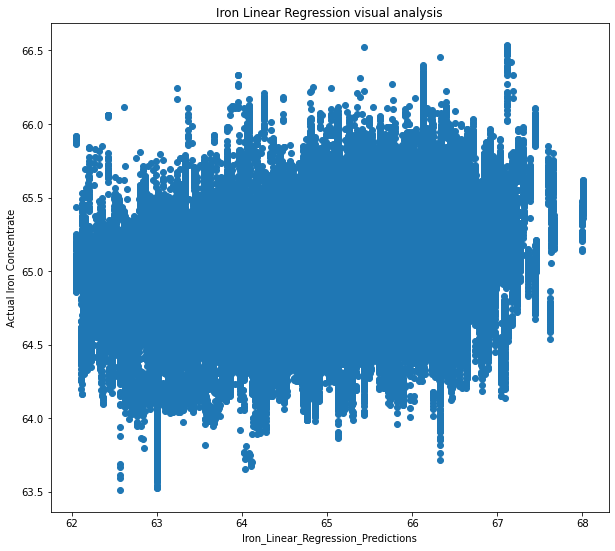

In [79]:
#Now I want to use a scatter plot to see how the linear regression model did
plt.figure(figsize=(10,9))
plt.scatter(y_test,iron_pred)
plt.xlabel('Iron_Linear_Regression_Predictions')
plt.ylabel('Actual Iron Concentrate')
plt.title('Iron Linear Regression visual analysis')

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% Iron Concentrate', ylabel='Density'>

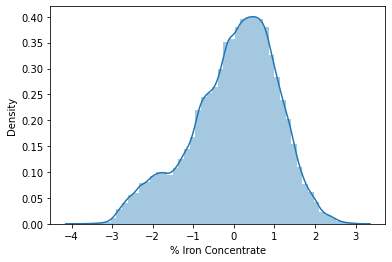

In [81]:
residuals = y_test - iron_pred
sns.distplot((residuals))

##### As we can see, our model seemed to be linearly correlated and the residuals seemed to be normally distrbuted but I would still go ahead and consult with experts in the process before using this data to drive future procedures. Now I will use the sklearn metrics to further evaluate our model

In [82]:
from sklearn import metrics

In [85]:
print(f'MAE: {metrics.mean_absolute_error(y_test,iron_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, iron_pred)}')
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, iron_pred))}")

MAE: 0.8543276805827227
MSE: 1.1450435430349108
RMSE: 1.070067074082233


#### Now I want to build another linear regression model using the mean columns for the airflow and column level features which were deemed unimportant


In [86]:
lr_iron2 = LinearRegression()

In [87]:
important_columns.columns

Index(['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'airflow_mean',
       'column_level_mean', '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [88]:
X = important_columns[['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'airflow_mean',
       'column_level_mean']]
y = important_columns['% Iron Concentrate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
lr_iron2.fit(X_train,y_train)

LinearRegression()

In [90]:
iron_pred2 = lr_iron2.predict(X_test)

#### Time for visual analysis

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Iron Linear Regression visual analysis')

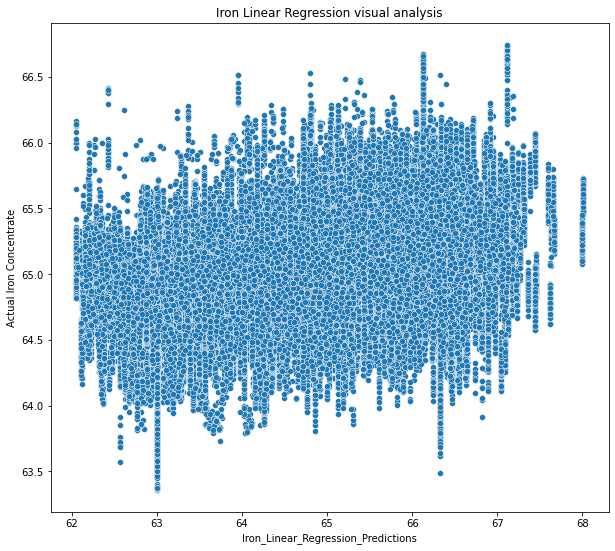

In [93]:
plt.figure(figsize=(10,9))
sns.scatterplot(y_test, iron_pred2)
plt.xlabel('Iron_Linear_Regression_Predictions')
plt.ylabel('Actual Iron Concentrate')
plt.title('Iron Linear Regression visual analysis')

C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% Iron Concentrate', ylabel='Density'>

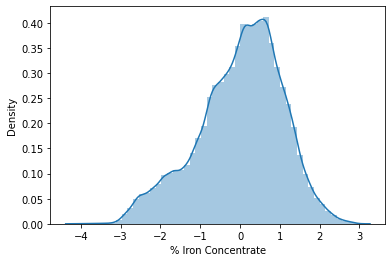

In [99]:
residuals = y_test - iron_pred2
sns.distplot(residuals)

In [102]:
print(f'MAE: {metrics.mean_absolute_error(y_test,iron_pred2)}')
print(f'MSE: {metrics.mean_squared_error(y_test, iron_pred2)}')
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, iron_pred2))}")
# I think the second one was SLIGHTLY better than the first model because the errors were slightly lower

MAE: 0.8498293492119341
MSE: 1.132806445224314
RMSE: 1.0643338034772334


In [103]:
#Time to predict silica concentrate
important_columns.columns

Index(['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'airflow_mean',
       'column_level_mean', '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [104]:
X = important_columns[['hours', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density']]
y = important_columns['% Silica Concentrate']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
lr_silica = LinearRegression()

In [107]:
lr_silica.fit(X_train, y_train)

LinearRegression()

In [108]:
silica_pred = lr_silica.predict(X_test)

#### Visual Analysis time :) 

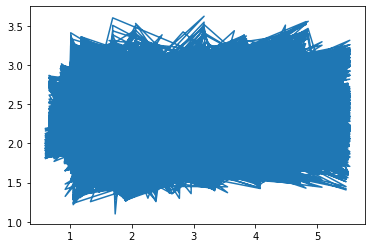

In [118]:
plt.plot(y_test, silica_pred) # The scatterplot didn't even work so I can imagine how bad this model was

#### For time's sake I will no longer try to build a model which includes the mean columns for airflow and column level

#### I also want to state that I recognize that this is not conclusive as the features could be combined to predict other outcomes but I will probably need to consult experts, thank you  